Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Normalized confusion matrix
[[0.34 0.66]
 [0.12 0.88]]


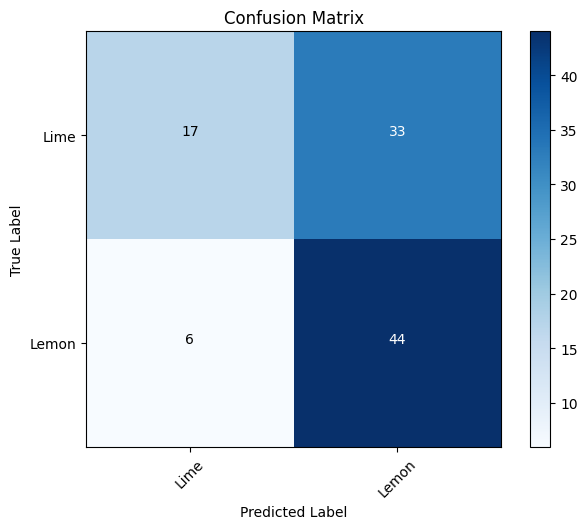

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline



path = r'C:\Users\hp\Downloads\data\Lime-Lemon'
os.chdir(path)
if os.path.isdir('train/Lime') is False:
    os.makedirs('train/Lime')
    os.makedirs('train/Lemon')
    os.makedirs('valid/Lime')
    os.makedirs('valid/Lemon')
    os.makedirs('test/Lime')
    os.makedirs('test/Lemon')

# Lime_files = glob.glob('Limes_*')
# print(len(Lime_files))

# if len(Lime_files) >= 200:
#     for c in random.sample(Lime_files, 200):
#         shutil.move(c, 'train/Lime')
# else:
#     print("Not enough 'Lime*' files to sample.")

    
# Lemon_files = glob.glob('Lemon_*')

# print(len(Lemon_files))
# if len(Lemon_files) >= 200:
#     for c in random.sample(Lemon_files, 200):
#         shutil.move(c, 'train/Lemon')
# else:
#     print("Not enough 'Lemon*' files to sample.")

    
# Lime_files = glob.glob('Limes_*')
# if len(Lime_files) >= 100:
#     for c in random.sample(Lime_files, 100):
#         shutil.move(c, 'valid/Lime')
# else:
#     print("Not enough 'Lime*' files to sample.")


# Lemon_files = glob.glob('Lemon_*')
# if len(Lemon_files) >= 100:
#     for c in random.sample(Lemon_files, 100):
#         shutil.move(c, 'valid/Lemon')
# else:
#     print("Not enough 'Lemon*' files to sample.")

    
# Lime_files = glob.glob('Limes_*')
# if len(Lime_files) >= 50:
#     for c in random.sample(Lime_files, 50):
#         shutil.move(c, 'test/Lime')
# else:
#     print("Not enough 'Lime*' files to sample.")
    
# Lemon_files = glob.glob('Lemon_*')
# if len(Lemon_files) >= 50:
#     for c in random.sample(Lemon_files, 50):
#         shutil.move(c, 'test/Lemon')
# else:
#     print("Not enough 'Lemon*' files to sample.")

os.chdir('../../')

train_path = 'data/Lime-Lemon/train'
valid_path = 'data/Lime-Lemon/valid'
test_path = 'data/Lime-Lemon/test'


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(244, 244), classes=['Lime', 'Lemon'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(244, 244), classes=['Lime', 'Lemon'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(244, 244), classes=['Lime', 'Lemon'], batch_size=10, shuffle=False)

assert train_batches.n == 400
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

imgs, labels = next(train_batches)

# plot
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


# plotImages(imgs)
# print(labels)
        
        
# BUILD AND TRAIN A CNN
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(244, 244, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

# model.summary()

           
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

test_imgs, test_labels = next(test_batches)
# plotImages(test_imgs)
# print(test_labels)

# test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)
np.round(predictions)


cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",  # Add the missing comma here
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

test_batches.class_indices

cm_plot_labels = ['Lime', 'Lemon']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')